# Imports

In [2]:
# Import the relevant packages
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [26]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

# 2016

### Grab and format data

In [6]:
df=pd.read_csv('../data/Season_2016.csv')

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [9]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [10]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [11]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [12]:
df.home_win.value_counts(normalize=True)

1    0.533773
0    0.466227
Name: home_win, dtype: float64

In [13]:
df2.home_win.value_counts(normalize=True)

1    0.562637
0    0.437363
Name: home_win, dtype: float64

In [14]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1366,SEA,34.462963,4.740741,8.925926,4.537037,4.618457,3.123457,7.950617,38.438272,0.252698,...,12.314815,14.179012,6.648148,0.006173,51.401235,1.308176,0.364780,0.017660,-0.043210,0
1367,OAK,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
1368,CIN,33.870370,4.419753,8.660494,4.185185,4.202778,2.790123,7.925926,37.617284,0.250488,...,13.129630,14.141975,7.154321,0.006173,52.814815,1.456250,0.506250,0.056568,0.306173,1
1369,SDP,33.450617,4.234568,7.870370,4.037037,4.000432,2.771605,9.259259,37.043210,0.229815,...,12.358025,13.975309,6.709877,0.006173,50.462963,1.628931,0.572327,0.020198,-0.025309,1
1370,NYY,33.691358,4.197531,8.506173,3.993827,4.063457,2.932099,7.333333,37.401235,0.246086,...,11.037037,14.623457,5.901235,0.000000,44.777778,1.796296,0.537037,-0.052963,-0.850617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,CLE,34.062112,4.826087,8.913043,4.552795,4.610807,3.298137,7.739130,38.229814,0.258199,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,1
1817,DET,34.322981,4.658385,9.167702,4.465839,4.594472,3.062112,8.093168,38.055901,0.262335,...,11.037037,14.623457,5.901235,0.000000,44.777778,1.796296,0.537037,-0.052963,-0.850617,0
1818,TBR,33.833333,4.148148,8.228395,3.993827,4.000864,2.771605,9.148148,37.320988,0.237667,...,12.759259,14.685185,6.975309,0.012346,48.746914,1.320755,0.452830,-0.057741,-0.144444,0
1819,ATL,34.248447,4.031056,8.720497,3.819876,3.707019,3.118012,7.701863,38.459627,0.250807,...,11.327160,13.641975,6.604938,0.000000,48.685185,1.425000,0.462500,-0.027525,-0.255556,0


In [15]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,PIT,34.209877,4.500000,8.802469,4.296296,4.191914,3.462963,8.234568,38.648148,0.252074,...,13.777778,13.111111,6.827160,0.006173,51.438272,1.440994,0.515528,-0.040438,-0.433333,1
1,KCR,34.271605,4.166667,8.950617,3.950617,3.969568,2.358025,7.555556,37.358025,0.256889,...,12.104938,13.851852,6.907407,0.000000,52.382716,1.493750,0.318750,0.035586,0.180864,1
2,TBR,33.833333,4.148148,8.228395,3.993827,4.000864,2.771605,9.148148,37.320988,0.237667,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
3,OAK,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,11.833333,14.907407,7.006173,0.006173,51.216049,1.367089,0.360759,0.009222,0.217284,0
4,ARI,34.969136,4.641975,9.129630,4.376543,4.270370,2.858025,8.808642,38.641975,0.254932,...,13.969136,13.481481,7.308642,0.006173,47.030864,1.559006,0.552795,-0.033364,-0.499383,0


In [16]:
#for col in X_train.columns:
    #print(col)

In [17]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [18]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [19]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1366,SEA,34.462963,4.740741,8.925926,4.537037,4.618457,3.123457,7.950617,38.438272,0.252698,...,12.314815,14.179012,6.648148,0.006173,51.401235,1.308176,0.364780,0.017660,-0.043210,0
1367,OAK,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
1368,CIN,33.870370,4.419753,8.660494,4.185185,4.202778,2.790123,7.925926,37.617284,0.250488,...,13.129630,14.141975,7.154321,0.006173,52.814815,1.456250,0.506250,0.056568,0.306173,1
1369,SDP,33.450617,4.234568,7.870370,4.037037,4.000432,2.771605,9.259259,37.043210,0.229815,...,12.358025,13.975309,6.709877,0.006173,50.462963,1.628931,0.572327,0.020198,-0.025309,1
1370,NYY,33.691358,4.197531,8.506173,3.993827,4.063457,2.932099,7.333333,37.401235,0.246086,...,11.037037,14.623457,5.901235,0.000000,44.777778,1.796296,0.537037,-0.052963,-0.850617,1


In [20]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [21]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [22]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [23]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [24]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

### PCA

In [40]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

In [41]:
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [42]:
pca=PCA(n_components=0.9)
train_pca_zero=pca.fit_transform(zero_imp_train)
test_pca_zero=pca.transform(zero_imp_test)

In [43]:
train_pca_zero = pd.DataFrame(train_pca_zero)
test_pca_zero = pd.DataFrame(test_pca_zero)

### Model

In [27]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


### Random Forest Using PCA and dropped zero importance features

In [48]:
rfeats= feature_select(train_pca_zero,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca_zero[rfeats]
X_test_best_for = test_pca_zero[rfeats]

Number of Trees: 75
criterion: entropy
Mean Cross-Val Score: 0.5085066987806713
Train Mean Accuracy: 0.7171883580450302
Test Mean Accuracy: 0.7054945054945055
Recall Score: 0.75390625
Precision Score: 0.7310606060606061
F1 score: 0.7423076923076923


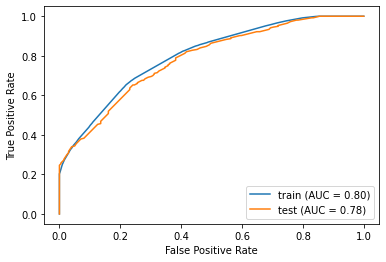

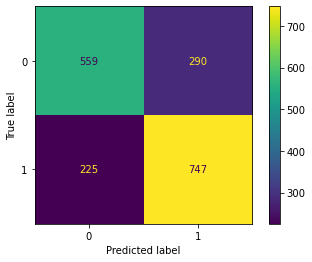

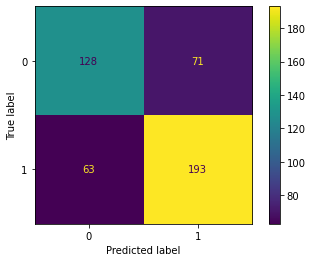

In [49]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [51]:
new_acc(probabilities)

(0.7548209366391184, 274)

### Random Forest Using PCA and All Feats

In [45]:
rfeats= feature_select(train_pca,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca[rfeats]
X_test_best_for = test_pca[rfeats]

Number of Trees: 75
criterion: gini
Mean Cross-Val Score: 0.5189417431883185
Train Mean Accuracy: 0.7171883580450302
Test Mean Accuracy: 0.7032967032967034
Recall Score: 0.7421875
Precision Score: 0.7335907335907336
F1 score: 0.737864077669903


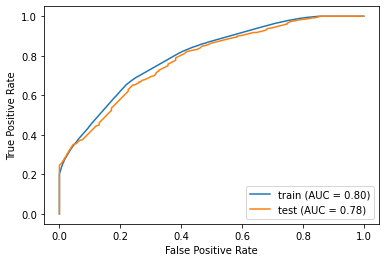

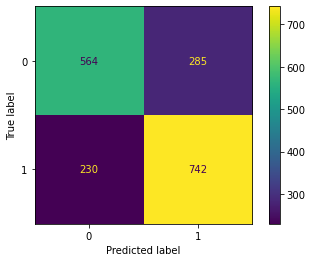

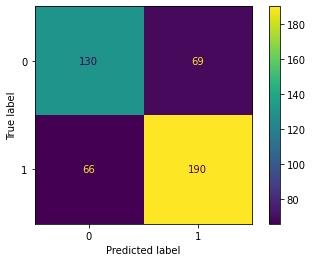

In [46]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [47]:
new_acc(probabilities)

(0.7577464788732394, 269)

# 2017

### Grab and Format Data

In [53]:
df=pd.read_csv('../data/Season_2017.csv')

In [54]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [55]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [56]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

In [57]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [58]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [59]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [60]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [68]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

### PCA

In [61]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

In [62]:
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [69]:
pca=PCA(n_components=0.9)
train_pca_zero=pca.fit_transform(zero_imp_train)
test_pca_zero=pca.transform(zero_imp_test)
train_pca_zero = pd.DataFrame(train_pca_zero)
test_pca_zero = pd.DataFrame(test_pca_zero)

### Random Forest With all Features PCA

In [64]:
rfeats= feature_select(train_pca,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca[rfeats]
X_test_best_for = test_pca[rfeats]

Number of Trees: 150
criterion: entropy
Mean Cross-Val Score: 0.5351226855336444
Train Mean Accuracy: 0.7074643249176729
Test Mean Accuracy: 0.7054945054945055
Recall Score: 0.7777777777777778
Precision Score: 0.7153284671532847
F1 score: 0.7452471482889734


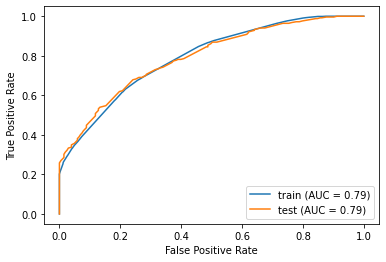

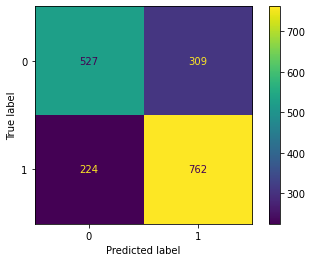

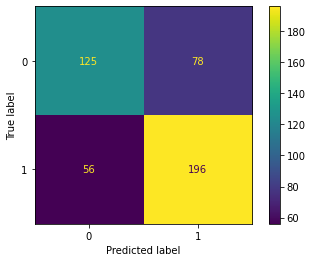

In [65]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [66]:
new_acc(probabilities)

(0.7672413793103449, 267)

### Random Forest Dropped Zero Importance Features

In [70]:
rfeats= feature_select(train_pca_zero,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca_zero[rfeats]
X_test_best_for = test_pca_zero[rfeats]

Number of Trees: 75
criterion: entropy
Mean Cross-Val Score: 0.5225124190877615
Train Mean Accuracy: 0.7074643249176729
Test Mean Accuracy: 0.7076923076923077
Recall Score: 0.7817460317460317
Precision Score: 0.7163636363636363
F1 score: 0.7476280834914611


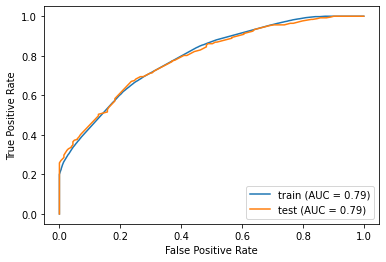

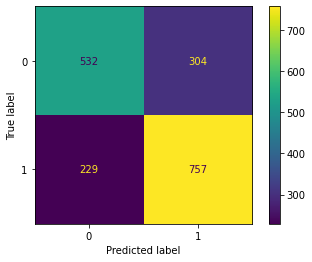

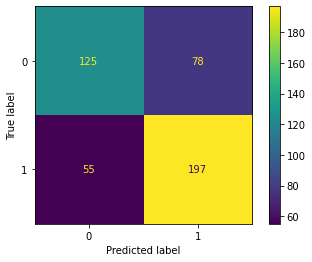

In [71]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [72]:
new_acc(probabilities)

(0.7657142857142857, 268)

# 2018

### Gathering and Format Data

In [73]:
df=pd.read_csv('../data/Season_2018.csv')

In [74]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [75]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [76]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

In [77]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [78]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

### PCA

In [79]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

In [80]:
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [81]:
pca=PCA(n_components=0.9)
train_pca_zero=pca.fit_transform(zero_imp_train)
test_pca_zero=pca.transform(zero_imp_test)
train_pca_zero = pd.DataFrame(train_pca_zero)
test_pca_zero = pd.DataFrame(test_pca_zero)

### Random Forest PCA All Features

In [82]:
rfeats= feature_select(train_pca,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca[rfeats]
X_test_best_for = test_pca[rfeats]

Number of Trees: 100
criterion: entropy
Mean Cross-Val Score: 0.5321240403432184
Train Mean Accuracy: 0.7127951674903898
Test Mean Accuracy: 0.6945054945054945
Recall Score: 0.7280334728033473
Precision Score: 0.7016129032258065
F1 score: 0.7145790554414785


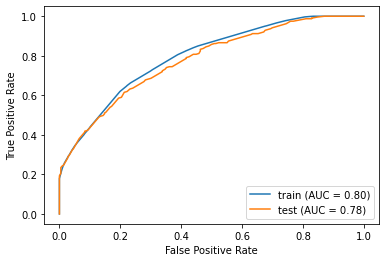

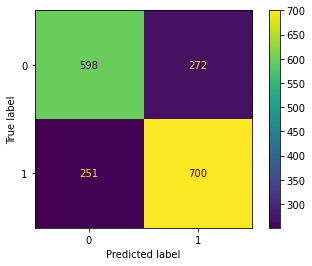

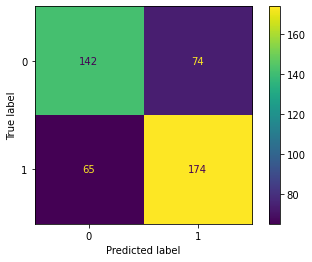

In [83]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [84]:
new_acc(probabilities)

(0.7613293051359517, 252)

### Random Forest PCA dropped zero importance features

In [85]:
rfeats= feature_select(train_pca_zero,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca_zero[rfeats]
X_test_best_for = test_pca_zero[rfeats]

Number of Trees: 100
criterion: entropy
Mean Cross-Val Score: 0.5354192382959506
Train Mean Accuracy: 0.7127951674903898
Test Mean Accuracy: 0.6945054945054945
Recall Score: 0.7280334728033473
Precision Score: 0.7016129032258065
F1 score: 0.7145790554414785


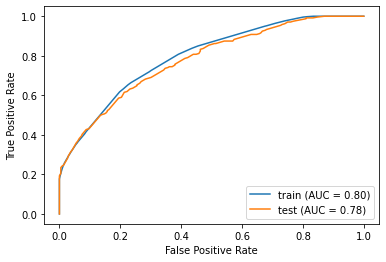

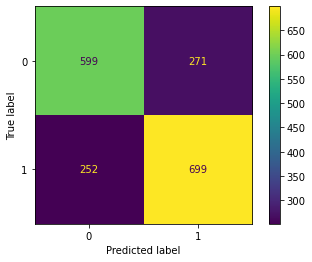

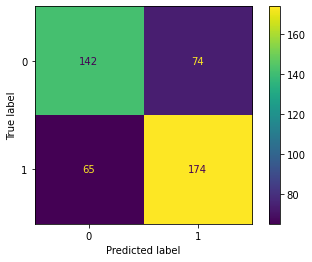

In [86]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [87]:
new_acc(probabilities)

(0.7582089552238805, 254)

# 2019

### Data Gathering and Formatting 

In [88]:
df=pd.read_csv('../data/Season_2019.csv')

In [89]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [90]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [91]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

In [92]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [93]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [94]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [95]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

### PCA

In [96]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [97]:
pca=PCA(n_components=0.9)
train_pca_zero=pca.fit_transform(zero_imp_train)
test_pca_zero=pca.transform(zero_imp_test)
train_pca_zero = pd.DataFrame(train_pca_zero)
test_pca_zero = pd.DataFrame(test_pca_zero)

### Random Forest PCA all Features

In [98]:
rfeats= feature_select(train_pca,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca[rfeats]
X_test_best_for = test_pca[rfeats]

Number of Trees: 150
criterion: entropy
Mean Cross-Val Score: 0.5532967032967033
Train Mean Accuracy: 0.7098901098901099
Test Mean Accuracy: 0.7230769230769231
Recall Score: 0.728744939271255
Precision Score: 0.7531380753138075
F1 score: 0.7407407407407407


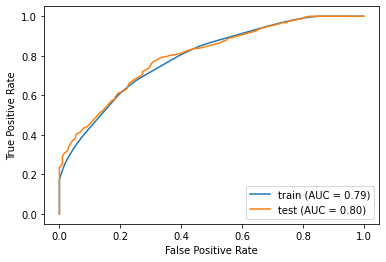

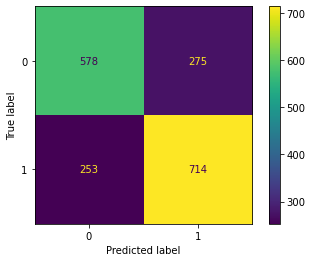

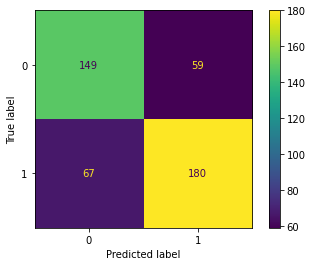

In [99]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [100]:
new_acc(probabilities)

(0.7670454545454546, 270)

### Random Forest PCA dropped zero importance features

In [101]:
rfeats= feature_select(train_pca_zero,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca_zero[rfeats]
X_test_best_for = test_pca_zero[rfeats]

Number of Trees: 150
criterion: entropy
Mean Cross-Val Score: 0.5604395604395604
Train Mean Accuracy: 0.7098901098901099
Test Mean Accuracy: 0.7230769230769231
Recall Score: 0.7206477732793523
Precision Score: 0.7574468085106383
F1 score: 0.7385892116182574


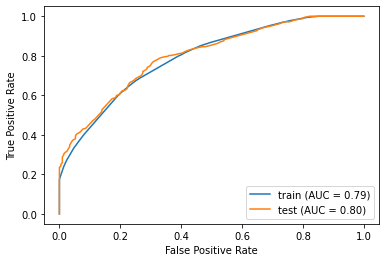

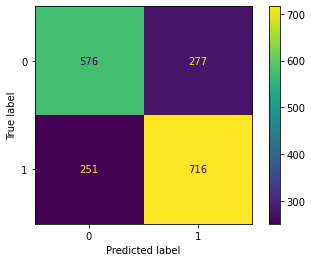

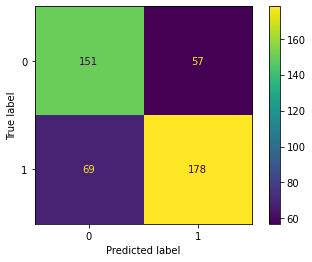

In [102]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [103]:
new_acc(probabilities)

(0.7633802816901408, 271)

# 2020

### Data Gathering and Formatting

In [104]:
df=pd.read_csv('../data/Season_2020.csv')

In [105]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [106]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [107]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

In [108]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [110]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [111]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [112]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

### PCA

In [113]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [114]:
pca=PCA(n_components=0.9)
train_pca_zero=pca.fit_transform(zero_imp_train)
test_pca_zero=pca.transform(zero_imp_test)
train_pca_zero = pd.DataFrame(train_pca_zero)
test_pca_zero = pd.DataFrame(test_pca_zero)

### Random Forest PCA and All Feats

In [115]:
rfeats= feature_select(train_pca,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca[rfeats]
X_test_best_for = test_pca[rfeats]

Number of Trees: 150
criterion: gini
Mean Cross-Val Score: 0.45191256830601095
Train Mean Accuracy: 0.6105610561056105
Test Mean Accuracy: 0.6133333333333333
Recall Score: 0.5714285714285714
Precision Score: 0.6857142857142857
F1 score: 0.6233766233766234


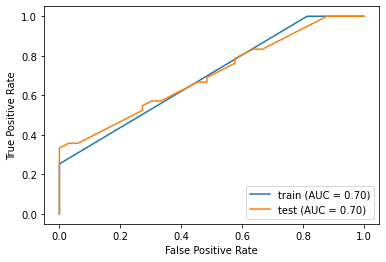

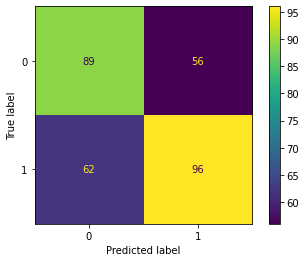

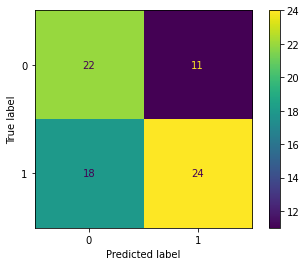

In [116]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [117]:
new_acc(probabilities)

(1.0, 17)

### Random Forest with PCA and dropped zero importance features

In [118]:
rfeats= feature_select(train_pca_zero,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca_zero[rfeats]
X_test_best_for = test_pca_zero[rfeats]

Number of Trees: 500
criterion: entropy
Mean Cross-Val Score: 0.45513661202185796
Train Mean Accuracy: 0.6105610561056105
Test Mean Accuracy: 0.64
Recall Score: 0.7619047619047619
Precision Score: 0.6530612244897959
F1 score: 0.7032967032967032


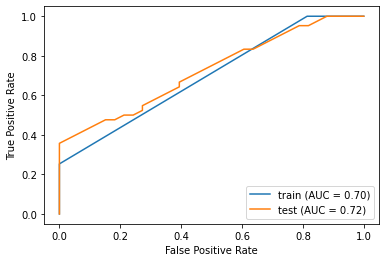

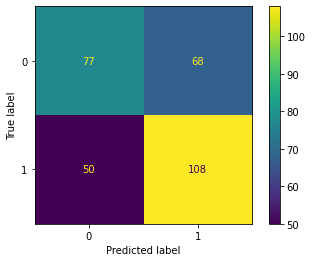

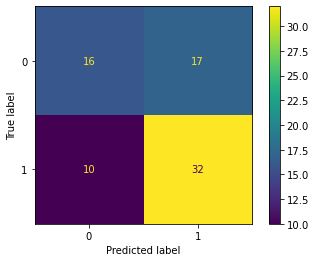

In [119]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [120]:
new_acc(probabilities)

(1.0, 17)

# 2021

### Data Gathering and Formatting

In [121]:
df=pd.read_csv('../data/Season_2021.csv')

In [122]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [123]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [124]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

In [125]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [126]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [127]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

### PCA

In [128]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [129]:
pca=PCA(n_components=0.9)
train_pca_zero=pca.fit_transform(zero_imp_train)
test_pca_zero=pca.transform(zero_imp_test)
train_pca_zero = pd.DataFrame(train_pca_zero)
test_pca_zero = pd.DataFrame(test_pca_zero)

### Random Forest PCA All Features

In [130]:
rfeats= feature_select(train_pca,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca[rfeats]
X_test_best_for = test_pca[rfeats]

Number of Trees: 75
criterion: gini
Mean Cross-Val Score: 0.45023145868216297
Train Mean Accuracy: 0.5680224403927069
Test Mean Accuracy: 0.5674157303370787
Recall Score: 0.6086956521739131
Precision Score: 0.5773195876288659
F1 score: 0.5925925925925926


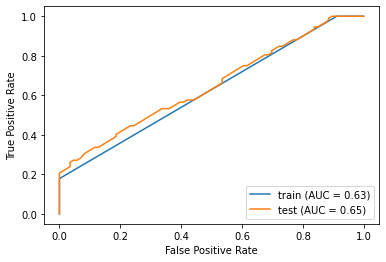

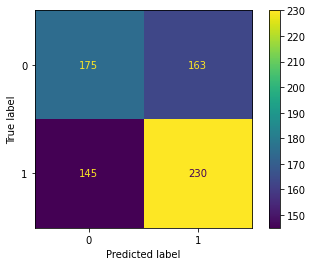

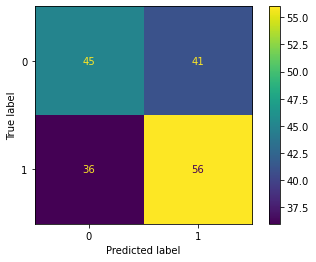

In [131]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [132]:
new_acc(probabilities)

(0.9666666666666667, 29)

### Random Forest PCA dropped zero importance features

In [133]:
rfeats= feature_select(train_pca_zero,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = train_pca_zero[rfeats]
X_test_best_for = test_pca_zero[rfeats]

Number of Trees: 90
criterion: gini
Mean Cross-Val Score: 0.4530286614793657
Train Mean Accuracy: 0.5680224403927069
Test Mean Accuracy: 0.5786516853932584
Recall Score: 0.5978260869565217
Precision Score: 0.5913978494623656
F1 score: 0.5945945945945945


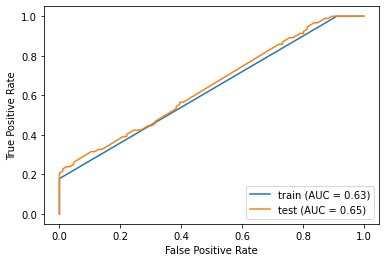

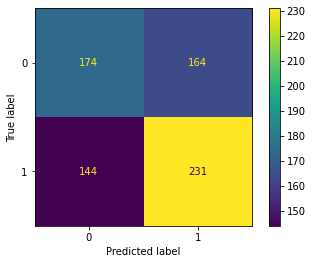

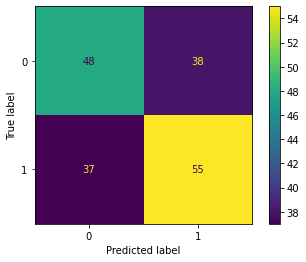

In [134]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [135]:
new_acc(probabilities)

(1.0, 28)